<a href="https://colab.research.google.com/github/MuhammadShan7/CNN-Models/blob/main/Cotton_leaf_VGG19_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession


In [ ]:
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/client/session.py:1768: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.vgg19 import VGG19
import tensorflow as tf
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import random
import keras
from keras import optimizers 
from keras import metrics
#import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Dataset/cotton1/train'
valid_path = '/content/drive/MyDrive/Dataset/cotton1/test'

In [ ]:
VGG19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
for layer in VGG19.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/Dataset/cotton1/train/*')

In [ ]:
x = Flatten()(VGG19.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=VGG19.input, outputs=prediction)

In [ ]:
model.summary()

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/cotton1/train',
                                                 target_size = (224, 224),
                                                 batch_size = 8,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/cotton1/test',
                                            target_size = (224, 224),
                                            batch_size = 8,
                                            class_mode = 'categorical')

Found 106 images belonging to 4 classes.


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/5
244/244 [==============================] - 62s 240ms/step - loss: 0.5994 - accuracy: 0.7724 - val_loss: 0.3757 - val_accuracy: 0.8208
Epoch 2/5
244/244 [==============================] - 55s 225ms/step - loss: 0.3698 - accuracy: 0.8703 - val_loss: 0.1275 - val_accuracy: 0.9717
Epoch 3/5
244/244 [==============================] - 55s 223ms/step - loss: 0.4194 - accuracy: 0.8621 - val_loss: 0.2615 - val_accuracy: 0.8774
Epoch 4/5
244/244 [==============================] - 54s 222ms/step - loss: 0.2579 - accuracy: 0.9103 - val_loss: 0.5728 - val_accuracy: 0.8679
Epoch 5/5
244/244 [==============================] - 54s 221ms/step - loss: 0.1759 - accuracy: 0.9370 - val_loss: 0.1452 - val_accuracy: 0.9340


In [ ]:
model.save("VGG19.h5")


In [ ]:
tf.keras.models.save_model(model, 'vgg19-C.h5')

In [ ]:
tf.keras.models.save_model(model, 'vgg19-C.hdf5')

In [ ]:
import matplotlib.pyplot as plt

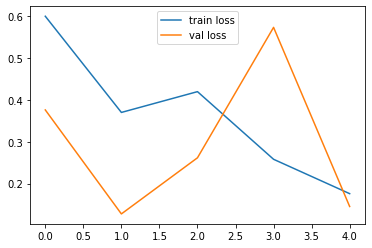

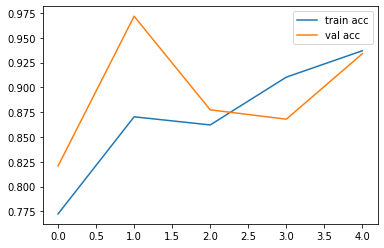

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')